XGBoosting
1. Supervised
2. Regression(continuous values)

In [1]:
#import the required packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics

In [2]:
#Data collection and preprocessing
car_df = pd.read_csv('/content/car data.csv')
car_df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [ ]:
car_df.shape

(301, 9)

In [3]:
#get some information about the dataset
car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [4]:
#checking the distribution of categorical data
print(car_df.Fuel_Type.value_counts())

Fuel_Type
Petrol    239
Diesel     60
CNG         2
Name: count, dtype: int64


In [5]:
print(car_df.Seller_Type.value_counts())

Seller_Type
Dealer        195
Individual    106
Name: count, dtype: int64


In [6]:
print(car_df.Transmission.value_counts())

Transmission
Manual       261
Automatic     40
Name: count, dtype: int64


In [7]:
#Encode the categorical data
car_df.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace=True)

<ipython-input-7-0beabf2ac6f5>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  car_df.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace=True)


In [8]:
car_df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,1,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,0,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,0,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,1,Dealer,Manual,0


In [9]:
car_df.replace({'Seller_Type':{'Dealer':0,'Individual':1}},inplace=True)

<ipython-input-9-2ed07a37740d>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  car_df.replace({'Seller_Type':{'Dealer':0,'Individual':1}},inplace=True)


In [ ]:
car_df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,Manual,0
1,sx4,2013,4.75,9.54,43000,1,0,Manual,0
2,ciaz,2017,7.25,9.85,6900,0,0,Manual,0
3,wagon r,2011,2.85,4.15,5200,0,0,Manual,0
4,swift,2014,4.60,6.87,42450,1,0,Manual,0


In [10]:
car_df.replace({'Transmission':{'Manual':0,'Automatic':1}},inplace=True)

<ipython-input-10-609a07e3c6ce>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  car_df.replace({'Transmission':{'Manual':0,'Automatic':1}},inplace=True)


In [11]:
car_df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


In [12]:
#SPlitting the data and target
X = car_df.drop(['Car_Name','Selling_Price'],axis=1)
Y = car_df['Selling_Price']

In [13]:
print(X.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Year           301 non-null    int64  
 1   Present_Price  301 non-null    float64
 2   Kms_Driven     301 non-null    int64  
 3   Fuel_Type      301 non-null    int64  
 4   Seller_Type    301 non-null    int64  
 5   Transmission   301 non-null    int64  
 6   Owner          301 non-null    int64  
dtypes: float64(1), int64(6)
memory usage: 16.6 KB
None


In [14]:
print(Y)

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64


In [15]:
#Splitting the data to Test and train
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.1,random_state=2)

In [16]:
X_train.shape

(270, 7)

In [ ]:
X_test.shape

(31, 7)

In [17]:
#XGBoosting
model = XGBRegressor()

In [18]:
model.fit(X_train,Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [19]:
#Model Evaluation
training_prediction = model.predict(X_train)

In [20]:
training_prediction

array([ 2.7514455 ,  5.286331  ,  9.707471  ,  0.20949337,  5.959297  ,
        8.37231   ,  5.7575183 ,  7.4968004 ,  5.1754756 , 15.9894905 ,
        0.7980102 ,  0.39089105,  0.362431  ,  4.919089  ,  9.214816  ,
        0.3749123 ,  6.080093  , 19.744907  ,  2.5288534 ,  6.860724  ,
        0.44728234,  7.054867  ,  0.72960234,  0.8756308 ,  0.37847975,
        0.3795372 ,  3.9994054 ,  0.4364336 ,  0.10800967, 11.242038  ,
        9.111384  ,  1.3571184 ,  2.852996  ,  0.4911916 ,  1.5053328 ,
        2.4897826 ,  1.129901  ,  0.6114108 ,  0.74654466,  0.48983276,
        3.7781317 ,  4.8550496 ,  0.5512992 ,  2.7484844 ,  4.5802784 ,
        0.47824633,  1.3441845 ,  7.4016376 ,  4.495199  ,  5.397501  ,
        3.4930227 ,  2.8888059 ,  5.2138247 ,  1.1498964 ,  0.51571625,
        2.8387473 ,  1.9722304 ,  4.507454  ,  1.1072427 ,  4.4996347 ,
        6.266098  ,  5.1115704 ,  1.1999105 , 32.997868  ,  2.2530136 ,
        5.6442275 ,  2.2453856 ,  3.2497625 ,  2.5012732 , 11.50

In [21]:
#R squared error
error_score = metrics.r2_score(Y_train,training_prediction)
print('R squared Error : ',error_score)

R squared Error :  0.9999896680984235


Text(0, 0.5, 'Predicted Price')

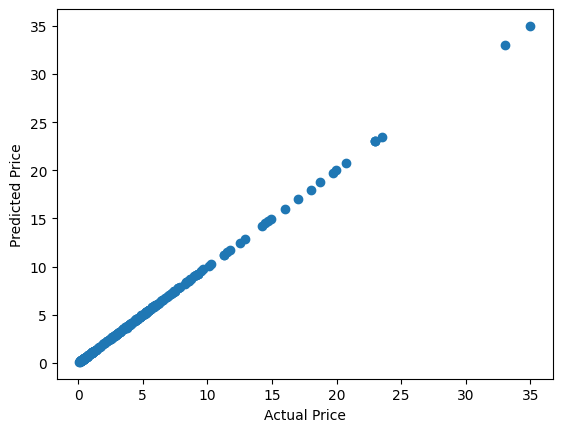

In [22]:
plt.scatter(Y_train,training_prediction)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')

In [23]:
#prediction on Testing data
test_prediction = model.predict(X_test)

In [24]:
test_prediction

array([ 8.792246  ,  0.49586606,  3.9864168 ,  3.0625799 , 10.641794  ,
        4.725404  ,  3.3360581 ,  6.7096004 ,  0.21394286,  5.752082  ,
        7.4469604 ,  4.415965  ,  0.41236195,  8.60621   ,  2.4452617 ,
        0.8416189 ,  0.679435  ,  0.44924533,  9.9373455 ,  4.0144978 ,
        1.4115442 ,  8.295046  ,  0.3994166 ,  9.390619  ,  0.6561221 ,
        6.9745398 ,  0.71781   ,  0.16392803,  3.077301  ,  2.2207417 ,
        0.4504009 ], dtype=float32)

In [25]:
#R squared error
error_score = metrics.r2_score(Y_test, test_prediction)
print('R squared Error : ',error_score)

R squared Error :  0.9807321370840111


Text(0, 0.5, 'Predicted Price')

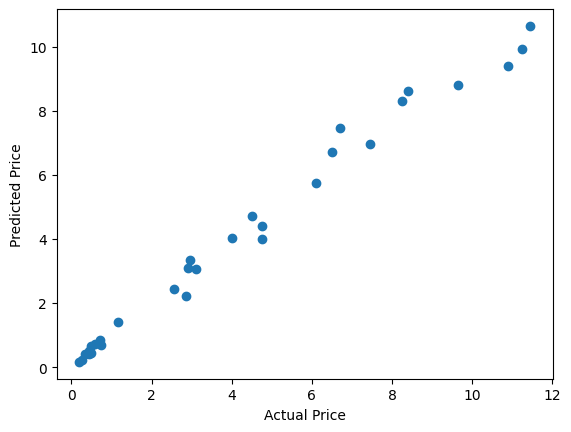

In [26]:
plt.scatter(Y_test,test_prediction)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')

In [30]:
input = pd.DataFrame({
    'Year':[2018],
    'Present_Price':[5.59],
    'Kms_Driven':[27000],
    'Fuel_Type':[0],
    'Seller_Type':[0],
    'Transmission':[1],
    'Owner':[0]
})

prediction = model.predict(input)
print(prediction)

[4.2377076]
